In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

data = pd.read_csv("CustomerServiceDataSet.csv")

## Part 1: EDA
#### Questions/Prompts
- How many reps are in each branch currently? -> value_counts
- What is the average of each type of call time? -> describe
- Number of calls taken per time block? -> basic viz


In [2]:
data.shape

(559, 14)

In [3]:
data.head()

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
2,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
3,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
4,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1


In [4]:
data.tail()

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
554,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1
555,North,Product Support,5:00 PM,Outgoing,A,Amanda,NO,0,0,12,1,NaN,2,1
556,South,Product Support,5:00 PM,Outgoing,D,George,NO,0,0,10,2,NaN,3,1
557,North,Product Support,5:00 PM,Outgoing,A,Cam,NO,0,0,11,2,NaN,2,1
558,North,Product Support,5:00 PM,Outgoing,B,Xander,NO,0,0,8,1,NaN,4,1


In [5]:
data.duplicated().sum()

5

In [6]:
data.drop_duplicates()

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
2,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
3,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
4,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1
555,North,Product Support,5:00 PM,Outgoing,A,Amanda,NO,0,0,12,1,NaN,2,1
556,South,Product Support,5:00 PM,Outgoing,D,George,NO,0,0,10,2,NaN,3,1
557,North,Product Support,5:00 PM,Outgoing,A,Cam,NO,0,0,11,2,NaN,2,1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Branch                 559 non-null    object 
 1   Call Purpose           559 non-null    object 
 2   Time Block             559 non-null    object 
 3   Incoming or Outgoing   559 non-null    object 
 4   Queue                  559 non-null    object 
 5   Rep ID                 559 non-null    object 
 6   Sale                   559 non-null    object 
 7   Lost Call              559 non-null    int64  
 8   Abandoned              559 non-null    int64  
 9   Busy Minutes           559 non-null    int64  
 10  Not Ready Minutes      559 non-null    int64  
 11  Incoming Wait Time     208 non-null    float64
 12  During Call Wait Time  559 non-null    int64  
 13  Calls                  559 non-null    int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 61.3+ KB


In [8]:
#time of calls seems to be descending, at 209 becomes NaN

In [9]:
data.shape

(559, 14)

In [10]:
# 1.  How many reps are in each branch currently?  (value_counts)
# https://re-thought.com/pandas-value_counts/

In [11]:
number_of_reps = data["Branch"].value_counts()
number_of_reps

South    314
North    245
Name: Branch, dtype: int64

In [12]:
# 2. What is the average of each type of call time? (describe)

In [13]:
# Entire table
#data.describe()

In [14]:
# value_counts queue counts
queue_count = data[["Queue"]].value_counts()
queue_count

Queue
D        176
B        149
C        138
A         96
dtype: int64

In [15]:
reps_describe = {"Rep ID":["count", "nunique", "size"]}
reps = data.groupby(["Queue"]).agg(reps_describe)
reps

Rep ID             
       count nunique size
Queue                    
A         96       4   96
B        149       5  149
C        138       5  138
D        176       6  176

In [16]:
sale_count = data["Sale"].value_counts()
sale_count

NO      542
YES      16
YES       1
Name: Sale, dtype: int64

<AxesSubplot:xlabel='Incoming or Outgoing', ylabel='Count'>

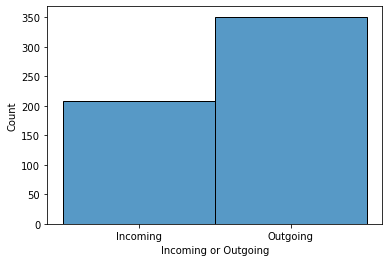

In [17]:
sns.histplot(data["Incoming or Outgoing"].dropna())

In [18]:
in_vs_out = data["Incoming or Outgoing"].value_counts()
in_vs_out

Outgoing    351
Incoming    208
Name: Incoming or Outgoing, dtype: int64

<AxesSubplot:xlabel='Call Purpose', ylabel='Count'>

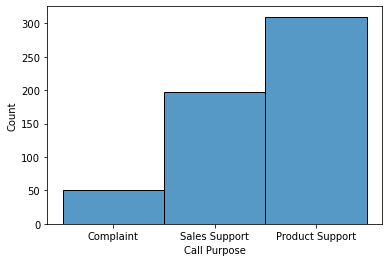

In [19]:
sns.histplot(data["Call Purpose"])

In [20]:
# sns.boxplot(data[["Lost Call", "Call Purpose"]])

In [21]:
# 3. Number of calls per time block? (basic viz)

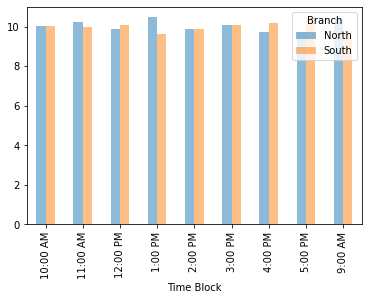

In [22]:
# Bar Chart
# Source: https://www.analyticsvidhya.com/blog/2021/02/an-intuitive-guide-to-visualization-in-python/
#Creating Data Set

data_pivot = pd.pivot_table(data, values = "Busy Minutes", index="Time Block", columns = "Branch")
chart_branch = data_pivot.plot(kind="bar", alpha = 0.5)
plt.show()

## Separating the Branches

- Looking at each branch spearately

In [23]:
north_branch = data[data["Branch"]=="North"]
north_branch.head()

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
5,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
6,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
9,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
12,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


In [24]:
north_branch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245 entries, 0 to 558
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Branch                 245 non-null    object 
 1   Call Purpose           245 non-null    object 
 2   Time Block             245 non-null    object 
 3   Incoming or Outgoing   245 non-null    object 
 4   Queue                  245 non-null    object 
 5   Rep ID                 245 non-null    object 
 6   Sale                   245 non-null    object 
 7   Lost Call              245 non-null    int64  
 8   Abandoned              245 non-null    int64  
 9   Busy Minutes           245 non-null    int64  
 10  Not Ready Minutes      245 non-null    int64  
 11  Incoming Wait Time     82 non-null     float64
 12  During Call Wait Time  245 non-null    int64  
 13  Calls                  245 non-null    int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 28.7+ KB


In [25]:
north_dropped = north_branch[["Lost Call", "Abandoned"]].sum()
north_dropped

Lost Call    5
Abandoned    7
dtype: int64

<AxesSubplot:xlabel='During Call Wait Time', ylabel='Count'>

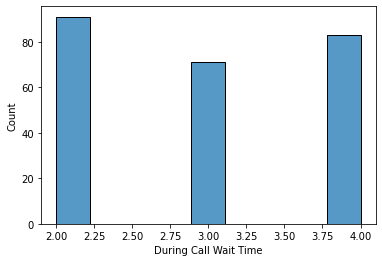

In [26]:
north_hist = sns.histplot(north_branch["During Call Wait Time"])
north_hist

In [27]:
south_branch = data[data["Branch"]=="South"]
south_branch.head()

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
1,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
2,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
3,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
4,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
7,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1


In [28]:
south_branch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 314 entries, 1 to 556
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Branch                 314 non-null    object 
 1   Call Purpose           314 non-null    object 
 2   Time Block             314 non-null    object 
 3   Incoming or Outgoing   314 non-null    object 
 4   Queue                  314 non-null    object 
 5   Rep ID                 314 non-null    object 
 6   Sale                   314 non-null    object 
 7   Lost Call              314 non-null    int64  
 8   Abandoned              314 non-null    int64  
 9   Busy Minutes           314 non-null    int64  
 10  Not Ready Minutes      314 non-null    int64  
 11  Incoming Wait Time     126 non-null    float64
 12  During Call Wait Time  314 non-null    int64  
 13  Calls                  314 non-null    int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 36.8+ KB


In [29]:
south_dropped = south_branch[["Lost Call", "Abandoned"]].sum()
south_dropped

Lost Call    11
Abandoned     4
dtype: int64

In [30]:
describe_south = south_branch.describe()
describe_south

,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
count,314.000000,314.000000,314.00000,314.000000,126.000000,314.000000,314.0
mean,0.035032,0.012739,10.05414,1.910828,3.000000,3.076433,1.0
std,0.184154,0.112324,1.40751,0.860016,1.308434,0.819424,0.0
min,0.000000,0.000000,8.00000,1.000000,1.000000,2.000000,1.0
25%,0.000000,0.000000,9.00000,1.000000,2.000000,2.000000,1.0
50%,0.000000,0.000000,10.00000,2.000000,3.000000,3.000000,1.0
75%,0.000000,0.000000,11.00000,3.000000,4.000000,4.000000,1.0
max,1.000000,1.000000,12.00000,3.000000,5.000000,4.000000,1.0


In [31]:
south_call_in = south_branch["Incoming or Outgoing"].str.contains("Incoming").sum()
south_call_in

126

In [32]:
south_call_out = south_branch["Incoming or Outgoing"].str.contains("Outgoing").sum()
south_call_out
south_call_out_percent = (south_call_out/(south_call_in + south_call_out) * 100).round(2)
print("{0}% of calls at the South Branch are outgoing.".format(south_call_out_percent))

59.87% of calls at the South Branch are outgoing.


In [33]:
# sns.scatterplot(data=data, x="Lost Call", y="During Call Wait Time")
# plt.show()
# playing with plots 

In [34]:
south_branch.tail()

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
551,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
552,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
553,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
554,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1
556,South,Product Support,5:00 PM,Outgoing,D,George,NO,0,0,10,2,NaN,3,1


In [35]:
south_branch.nlargest(5, "Busy Minutes").tail()

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
4,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
29,South,Complaint,11:00 AM,Incoming,D,Randy,NO,0,0,12,3,1.0,4,1
32,South,Complaint,1:00 PM,Incoming,C,Eric,NO,0,0,12,3,1.0,3,1
36,South,Complaint,5:00 PM,Incoming,D,Karl,NO,0,0,12,3,1.0,4,1
39,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,12,1,2.0,3,1


In [36]:
south_total_call = south_branch["Busy Minutes"] + south_branch["Incoming Wait Time"] + south_branch["During Call Wait Time"] - south_branch["Not Ready Minutes"]
south_total_call.head()

# Playing with total call time?  but this isn't tied to any reps, so not the most helpful as is

1    11.0
2    11.0
3    13.0
4    15.0
7     9.0
dtype: float64

In [37]:
# Adding a column to the south table
south_branch["Total Call Time"] = south_branch["Busy Minutes"] + south_branch["Incoming Wait Time"] + south_branch["During Call Wait Time"]
south_branch.head()

<ipython-input-37-e1178da6d4ae>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_branch["Total Call Time"] = south_branch["Busy Minutes"] + south_branch["Incoming Wait Time"] + south_branch["During Call Wait Time"]


,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls,Total Call Time
1,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1,12.0
2,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1,13.0
3,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1,15.0
4,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1,16.0
7,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1,12.0


In [38]:
# data["Call Purpose Number"] = data["Call Purpose"].replace({"Complaint" : 0, "Sales Support": 1, "Product Support":2})
# call_length_and_purpose = data.nsmallest(20, "Call Purpose Number").groupby(data["Time Block"])
# call_length_and_purpose.tail(100)

In [39]:
# minutes_not_ready = data.nlargest(10, "Not Ready Minutes").groupby(data["Call Purpose Number"])
# minutes_not_ready.head()

In [40]:
n_queue_count = north_branch[["Queue", "Rep ID"]].value_counts()
n_queue_count

Queue  Rep ID
B      Brent     37
       Lilly     30
       Duke      29
       Todd      29
A      Joe       26
       Cam       24
B      Xander    24
A      Amanda    23
       Andy      23
dtype: int64

In [41]:
s_queue_count = south_branch[["Queue", "Rep ID"]].value_counts()
s_queue_count

Queue  Rep ID
C      Eric      35
D      Randy     33
C      Sandy     32
D      Helga     31
       George    29
       Kate      29
       Karl      28
C      Susan     26
D      Josh      26
C      Sharon    25
       Alice     20
dtype: int64

# Questions to ask/Follow up on

- wait time, has a lot of missing values - do we assume it means no wait time?